Block 1 added: Block(index=1, previous_hash=bac4e24715167c77c795af113bc1d884fc6411af2fce7e788c7977b1367850c1, timestamp=1723227850.1418543, data=Node1: Patient Data, nonce=11154, hash=0000d37ca7542ce31677c4c94f753417a1756aa33baae3dbdfb4ba83eb8143dd)
Block 2 added: Block(index=2, previous_hash=0000d37ca7542ce31677c4c94f753417a1756aa33baae3dbdfb4ba83eb8143dd, timestamp=1723227850.2146723, data=Node2: Diagnosis Data, nonce=19441, hash=000006906b20b3291e7f642456e5f5c99a04434be23933f5f26b3c708113a4a5)
Block 3 added: Block(index=3, previous_hash=000006906b20b3291e7f642456e5f5c99a04434be23933f5f26b3c708113a4a5, timestamp=1723227850.3619595, data=Node3: Prescription Data, nonce=115722, hash=0000b30586dbd13226aa926c49ea25943593062087b2ff4fc09814e4ffd6bae6)
Blockchain valid? True


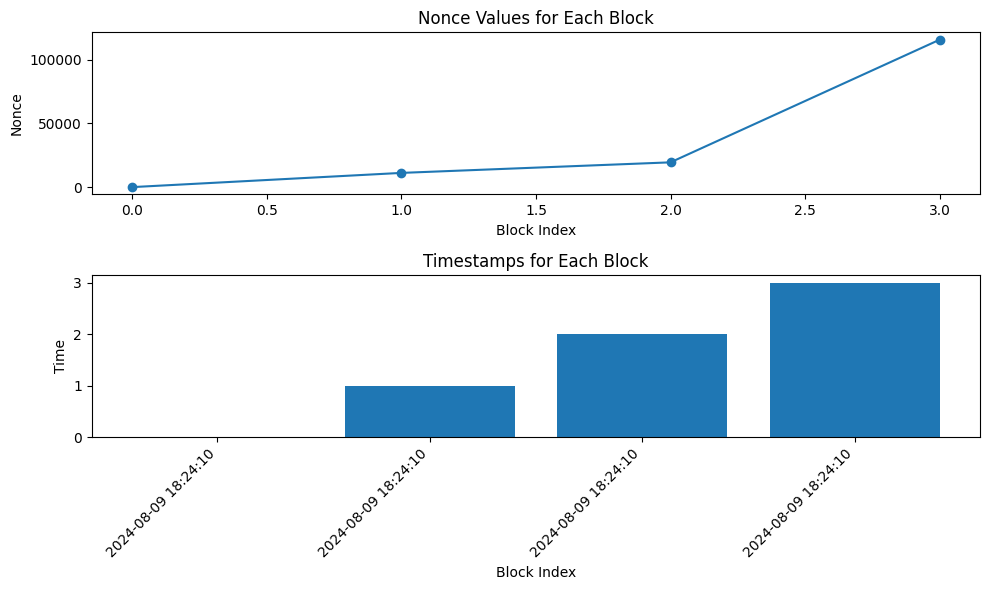

In [1]:
import hashlib
import time
import matplotlib.pyplot as plt

class Block:
    def __init__(self, index, previous_hash, timestamp, data, nonce=0):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        value = str(self.index) + str(self.previous_hash) + str(self.timestamp) + str(self.data) + str(self.nonce)
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    def __str__(self):
        return f"Block(index={self.index}, previous_hash={self.previous_hash}, timestamp={self.timestamp}, data={self.data}, nonce={self.nonce}, hash={self.hash})"

class Blockchain:
    def __init__(self, difficulty=4):
        self.chain = [self.create_genesis_block()]
        self.difficulty = difficulty

    def create_genesis_block(self):
        return Block(0, "0", time.time(), "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.hash = self.proof_of_work(new_block)
        self.chain.append(new_block)

    def proof_of_work(self, block):
        while block.hash[:self.difficulty] != "0" * self.difficulty:
            block.nonce += 1
            block.hash = block.calculate_hash()
        return block.hash

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i-1]

            if current_block.hash != current_block.calculate_hash():
                return False

            if current_block.previous_hash != previous_block.hash:
                return False

        return True

# Example of Healthcare Nodes Adding Blocks
def main():
    blockchain = Blockchain(difficulty=4)

    healthcare_nodes = ["Node1: Patient Data", "Node2: Diagnosis Data", "Node3: Prescription Data"]

    for i, data in enumerate(healthcare_nodes):
        new_block = Block(i + 1, blockchain.get_latest_block().hash, time.time(), data)
        blockchain.add_block(new_block)
        print(f"Block {new_block.index} added: {new_block}")

    # Check if blockchain is valid
    print("Blockchain valid?", blockchain.is_chain_valid())

    # Graphical Representation of Blockchain Data
    plot_blockchain(blockchain)

def plot_blockchain(blockchain):
    block_indices = []
    block_hashes = []
    block_nonces = []
    timestamps = []

    for block in blockchain.chain:
        block_indices.append(block.index)
        block_hashes.append(block.hash)
        block_nonces.append(block.nonce)
        timestamps.append(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(block.timestamp)))

    plt.figure(figsize=(10, 6))

    # Plot Nonces
    plt.subplot(2, 1, 1)
    plt.plot(block_indices, block_nonces, marker='o')
    plt.title('Nonce Values for Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Nonce')

    # Plot Timestamps
    plt.subplot(2, 1, 2)
    plt.bar(block_indices, range(len(block_indices)), tick_label=timestamps)
    plt.xticks(rotation=45, ha='right')
    plt.title('Timestamps for Each Block')
    plt.xlabel('Block Index')
    plt.ylabel('Time')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
